## **Q1. Install and load the latest versions of TensorFlow and Keras. Print their versions.**

In [2]:
!pip install --upgrade tensorflow
!pip install --upgrade keras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 3.1 MB/s eta 0:00:00
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.15.0
    Uninstalling tensorflow-2.15.0:
      Successfully uninstalled tensorflow-2.15.0
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 9.3 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.15.0.post1 requires keras<2.16,>=2.15.0, but you have keras 3.0.2 which is incompatible.


In [19]:
import tensorflow as tf
import keras
print("TensorFlow version:", tf.__version__)
print("Keras version:",keras.__version__)


TensorFlow version: 2.15.0
Keras version: 3.0.2


**Q2. Load the Wine Quality dataset and explore its dimensions.**

https://www.kaggle.com/datasets/nareshbhat/wine-quality-binary-classification




In [21]:
import pandas as pd
data=pd.read_csv("/content/drive/MyDrive/Data Set/wine.csv")

In [23]:
data.shape

(1599, 12)

**Q3. Check for null values, identify categorical variables, and encode them.**



In [24]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   object 
dtypes: float64(11), object(1)
memory usage: 150.0+ KB


In [27]:
data['quality']

0        bad
1        bad
2        bad
3       good
4        bad
        ... 
1594     bad
1595    good
1596    good
1597     bad
1598    good
Name: quality, Length: 1599, dtype: object

In [29]:
from sklearn.preprocessing import LabelEncoder
lencode=LabelEncoder()

In [30]:
data['quality']=lencode.fit_transform(data['quality'])

In [31]:
data['quality'].head()

0    0
1    0
2    0
3    1
4    0
Name: quality, dtype: int64

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


**Q4. Separate the features and target variables from the dataframe.**



In [51]:
X=data.drop('quality',axis=1)
y=data['quality']

In [52]:
X.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [54]:
y.head(5)

0    0
1    0
2    0
3    1
4    0
Name: quality, dtype: int64

**Q5. Perform a train-test split and divide the data into training, validation, and test datasets.**



In [55]:
from sklearn.model_selection import train_test_split

# Perform train-test split
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)

# Further split the temporary set into validation and test sets
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)



In [56]:
# Display the shapes of the sets
print("Training set shapes:")
print("X_train:", X_train.shape)
print("y_train:", y_train.shape)

print("\nValidation set shapes:")
print("X_val:", X_val.shape)
print("y_val:", y_val.shape)

print("\nTest set shapes:")
print("X_test:", X_test.shape)
print("y_test:", y_test.shape)


Training set shapes:
X_train: (1119, 11)
y_train: (1119,)

Validation set shapes:
X_val: (240, 11)
y_val: (240,)

Test set shapes:
X_test: (240, 11)
y_test: (240,)


**Q6. Perform scaling on the dataset.**



In [60]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and validation sets
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

<ipython-input-62-b56d0f4aeb67>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 1)


Text(0.5, 1.0, 'X_train After Scaling')

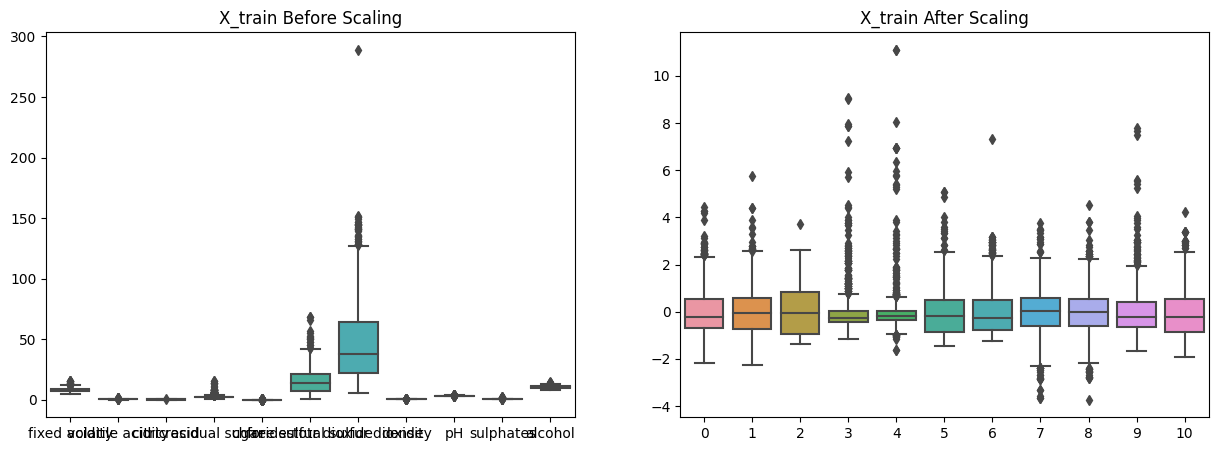

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.subplots(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.boxplot(data=X_train)
plt.title('X_train Before Scaling')
plt.subplot(1, 2, 2)
sns.boxplot(data=X_train_scaled)
plt.title('X_train After Scaling')

**Q7. Create at least 2 hidden layers and an output layer for the binary categorical variables.**



In [63]:
import tensorflow as tf
from tensorflow.keras import models, layers

# Create a neural network model
model = models.Sequential()

In [64]:
# Add at least two hidden layers
model.add(layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model.add(layers.Dense(32, activation='relu'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:73: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [65]:
# Add the output layer for binary classification
model.add(layers.Dense(1, activation='sigmoid'))

**Q8. Create a Sequential model and add all the layers to it.**



In [67]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display the model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┓
┃ Layer (type)                       ┃ Output Shape                  ┃     Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━┩
│ dense (Dense)                      │ (None, 64)                    │         768 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ dense_1 (Dense)                    │ (None, 32)                    │       2,080 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ dense_2 (Dense)                    │ (None, 1)                     │          33 │
└────────────────────────────────────┴───────────────────────────────┴─────────────┘

 Total params: 2,881 (11.25 KB)

 Trainable params: 2,881 (11.25 KB)

 Non-trainable params: 0 (0.00 B)

**Q9. Implement a TensorBoard callback to visualize and monitor the model's training process.**





In [68]:
from tensorflow.keras import models, layers, callbacks
# Define a TensorBoard callback
tensorboard_callback = callbacks.TensorBoard(log_dir='./logs', histogram_freq=1)

# Train the model with the TensorBoard callback
model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_data=(X_val_scaled, y_val), callbacks=[tensorboard_callback])

Epoch 1/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 6s 98ms/step - accuracy: 0.6535 - loss: 0.6434 - val_accuracy: 0.6375 - val_loss: 0.5975
Epoch 2/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7478 - loss: 0.5337 - val_accuracy: 0.6792 - val_loss: 0.5697
Epoch 3/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7560 - loss: 0.5270 - val_accuracy: 0.6833 - val_loss: 0.5698
Epoch 4/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7647 - loss: 0.4951 - val_accuracy: 0.6708 - val_loss: 0.5692
Epoch 5/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7593 - loss: 0.5022 - val_accuracy: 0.6833 - val_loss: 0.5639
Epoch 6/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7835 - loss: 0.4651 - val_accuracy: 0.6792 - val_loss: 0.5627
Epoch 7/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7907 - loss: 0.4690 - val_accuracy: 0.6750 - val_loss: 0.5668
Epoch 8/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7642 - loss: 0.5008 - val_accuracy: 0.6958 - val_loss

**Q10. Use Early Stopping to prevent overfitting by monitoring a chosen metric and stopping the training if no improvement is observed.**



In [69]:
# Define Early Stopping callback
early_stopping_callback = callbacks.EarlyStopping(
    monitor='val_loss',  # Choose the metric to monitor (e.g., validation loss)
    patience=3,  # Number of epochs with no improvement after which training will be stopped
    restore_best_weights=True  # Restore model weights from the epoch with the best value of the monitored metric
)

# Train the model with Early Stopping callback
history = model.fit(
    X_train_scaled, y_train,
    epochs=50,
    batch_size=32,
    validation_data=(X_val_scaled, y_val),
    callbacks=[early_stopping_callback]
)

Epoch 1/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.7786 - loss: 0.4694 - val_accuracy: 0.7042 - val_loss: 0.5574
Epoch 2/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8108 - loss: 0.4358 - val_accuracy: 0.7000 - val_loss: 0.5532
Epoch 3/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7727 - loss: 0.4790 - val_accuracy: 0.7000 - val_loss: 0.5599
Epoch 4/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7804 - loss: 0.4714 - val_accuracy: 0.7083 - val_loss: 0.5533
Epoch 5/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.7943 - loss: 0.4497 - val_accuracy: 0.7000 - val_loss: 0.5510
Epoch 6/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7999 - loss: 0.4439 - val_accuracy: 0.7125 - val_loss: 0.5529
Epoch 7/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7909 - loss: 0.4422 - val_accuracy: 0.6958 - val_loss: 0.5544
Epoch 8/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7850 - loss: 0.4389 - val_accuracy: 0.7000 - val_lo

**Q11. Implement a ModelCheckpoint callback to save the best model based on a chosen metric during training.**


In [71]:
model_checkpoint_callback = callbacks.ModelCheckpoint(
    filepath='best_model.h5.keras',  # Specify the file path where the model will be saved
    monitor='val_loss',  # Choose the metric to monitor (e.g., validation loss)
    save_best_only=True,  # Save only the best model based on the monitored metric
    mode='min',  # 'min' means the model will be saved when the monitored metric is at its minimum
    verbose=1
)

# Train the model with ModelCheckpoint callback
history = model.fit(
    X_train_scaled, y_train,
    epochs=50,
    batch_size=32,
    validation_data=(X_val_scaled, y_val),
    callbacks=[model_checkpoint_callback]
)

Epoch 1/50
31/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8260 - loss: 0.4029 
Epoch 1: val_loss improved from inf to 0.53340, saving model to best_model.h5.keras
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8246 - loss: 0.4039 - val_accuracy: 0.7125 - val_loss: 0.5334
Epoch 2/50
31/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8262 - loss: 0.3940  
Epoch 2: val_loss improved from 0.53340 to 0.53012, saving model to best_model.h5.keras
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8251 - loss: 0.3958 - val_accuracy: 0.7417 - val_loss: 0.5301
Epoch 3/50
32/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8271 - loss: 0.3888 
Epoch 3: val_loss did not improve from 0.53012
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8254 - loss: 0.3906 - val_accuracy: 0.7167 - val_loss: 0.5400
Epoch 4/50
31/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8149 - loss: 0.3808 
Epoch 4: val_loss improved from 0.53012 to 0.52943, saving model to best_model.h5.keras
35/35 ━

**Q12. Print the model summary.**



In [72]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┓
┃ Layer (type)                       ┃ Output Shape                  ┃     Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━┩
│ dense (Dense)                      │ (None, 64)                    │         768 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ dense_1 (Dense)                    │ (None, 32)                    │       2,080 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ dense_2 (Dense)                    │ (None, 1)                     │          33 │
└────────────────────────────────────┴───────────────────────────────┴─────────────┘

 Total params: 8,645 (33.77 KB)

 Trainable params: 2,881 (11.25 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 5,764 (22.52 KB)

**Q13. Use binary cross-entropy as the loss function, Adam optimizer, and include the metric ['accuracy'].**



In [73]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])



**Q14. Compile the model with the specified loss function, optimizer, and metrics.**



In [74]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])



**Q15.Fit the model to the data, incorporating the TensorBoard, Early Stopping, and ModelCheckpoint callbacks.**



In [76]:
# Define TensorBoard, EarlyStopping, and ModelCheckpoint callbacks
tensorboard_callback = callbacks.TensorBoard(log_dir='./logs', histogram_freq=1)
early_stopping_callback = callbacks.EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)
model_checkpoint_callback = callbacks.ModelCheckpoint(
    filepath='best_model.h5.keras',
    monitor='val_loss',
    save_best_only=True,
    mode='min',
    verbose=1
)

# Fit the model with callbacks
history = model.fit(
    X_train_scaled, y_train,
    epochs=50,
    batch_size=32,
    validation_data=(X_val_scaled, y_val),
    callbacks=[tensorboard_callback, early_stopping_callback, model_checkpoint_callback]
)

Epoch 1/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8758 - loss: 0.2860
Epoch 1: val_loss improved from inf to 0.52717, saving model to best_model.h5.keras
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.8756 - loss: 0.2862 - val_accuracy: 0.7708 - val_loss: 0.5272
Epoch 2/50
20/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8907 - loss: 0.2789
Epoch 2: val_loss improved from 0.52717 to 0.51924, saving model to best_model.h5.keras
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8861 - loss: 0.2832 - val_accuracy: 0.7750 - val_loss: 0.5192
Epoch 3/50
20/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8584 - loss: 0.2869 
Epoch 3: val_loss did not improve from 0.51924
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8653 - loss: 0.2845 - val_accuracy: 0.7667 - val_loss: 0.5290
Epoch 4/50
22/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9093 - loss: 0.2541  
Epoch 4: val_loss did not improve from 0.51924
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accurac

**Q16. Get the model's parameters.**



In [77]:
# Get the model's parameters
model_params = model.get_weights()

# Display the parameters
for layer_num, layer_params in enumerate(model_params):
    print(f"Layer {layer_num + 1} parameters:")
    for param_num, param in enumerate(layer_params):
        print(f"Parameter {param_num + 1} shape: {param.shape}")


Layer 1 parameters:
Parameter 1 shape: (64,)
Parameter 2 shape: (64,)
Parameter 3 shape: (64,)
Parameter 4 shape: (64,)
Parameter 5 shape: (64,)
Parameter 6 shape: (64,)
Parameter 7 shape: (64,)
Parameter 8 shape: (64,)
Parameter 9 shape: (64,)
Parameter 10 shape: (64,)
Parameter 11 shape: (64,)
Layer 2 parameters:
Parameter 1 shape: ()
Parameter 2 shape: ()
Parameter 3 shape: ()
Parameter 4 shape: ()
Parameter 5 shape: ()
Parameter 6 shape: ()
Parameter 7 shape: ()
Parameter 8 shape: ()
Parameter 9 shape: ()
Parameter 10 shape: ()
Parameter 11 shape: ()
Parameter 12 shape: ()
Parameter 13 shape: ()
Parameter 14 shape: ()
Parameter 15 shape: ()
Parameter 16 shape: ()
Parameter 17 shape: ()
Parameter 18 shape: ()
Parameter 19 shape: ()
Parameter 20 shape: ()
Parameter 21 shape: ()
Parameter 22 shape: ()
Parameter 23 shape: ()
Parameter 24 shape: ()
Parameter 25 shape: ()
Parameter 26 shape: ()
Parameter 27 shape: ()
Parameter 28 shape: ()
Parameter 29 shape: ()
Parameter 30 shape: ()
Pa

**Q17. Store the model's training history as a Pandas DataFrame.**



In [78]:
import pandas as pd

# Fit the model and capture the training history
history = model.fit(
    X_train_scaled, y_train,
    epochs=50,
    batch_size=32,
    validation_data=(X_val_scaled, y_val),
    callbacks=[tensorboard_callback, early_stopping_callback, model_checkpoint_callback]
)

# Convert the history to a Pandas DataFrame
history_df = pd.DataFrame(history.history)

# Display the DataFrame
print(history_df.head())


Epoch 1/50
21/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8866 - loss: 0.2591 
Epoch 1: val_loss improved from 0.51924 to 0.51875, saving model to best_model.h5.keras
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8836 - loss: 0.2699 - val_accuracy: 0.7708 - val_loss: 0.5187
Epoch 2/50
23/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8774 - loss: 0.2643 
Epoch 2: val_loss did not improve from 0.51875
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8760 - loss: 0.2713 - val_accuracy: 0.7750 - val_loss: 0.5268
Epoch 3/50
22/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9007 - loss: 0.2632  
Epoch 3: val_loss did not improve from 0.51875
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8966 - loss: 0.2665 - val_accuracy: 0.7875 - val_loss: 0.5332
Epoch 4/50
24/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8840 - loss: 0.2867 
Epoch 4: val_loss did not improve from 0.51875
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8857 - loss: 0.2851 - val_accura

**Q18. Plot the model's training history.**



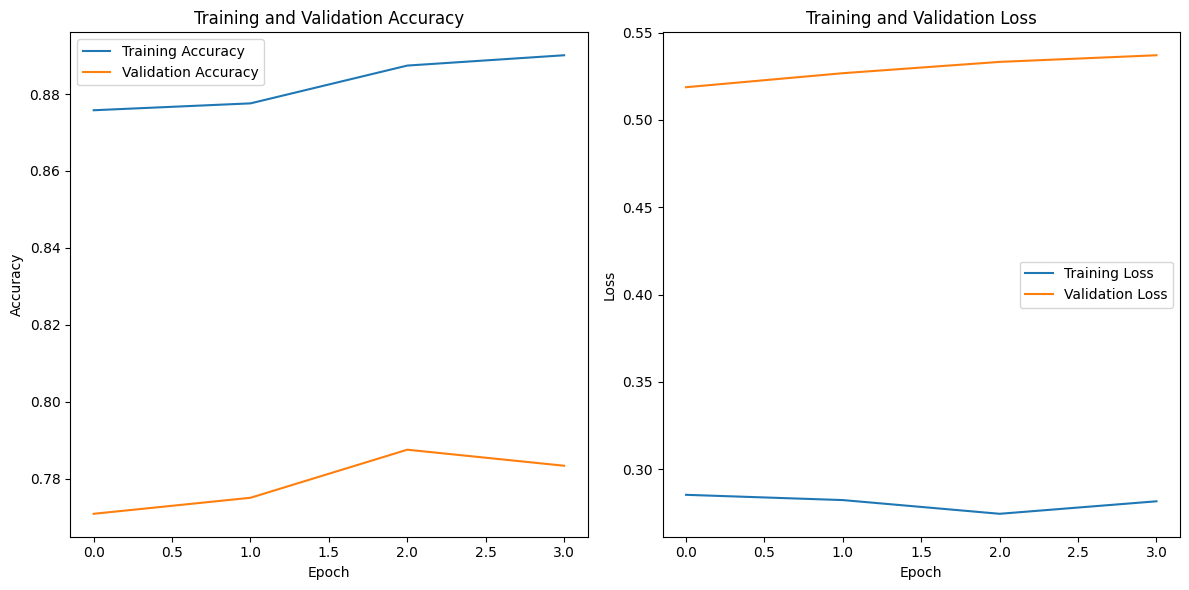

In [79]:
import matplotlib.pyplot as plt

# Plot the training history
plt.figure(figsize=(12, 6))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history_df['accuracy'], label='Training Accuracy')
plt.plot(history_df['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history_df['loss'], label='Training Loss')
plt.plot(history_df['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


**Q19. Evaluate the model's performance using the test data.**

In [80]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)

# Print the evaluation results
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8172 - loss: 0.4594 
Test Loss: 0.4741
Test Accuracy: 0.7958
